<a href="https://colab.research.google.com/github/ad045/ML_playground/blob/master/Assignment_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment A - Week 1** **: Maximum Likelihood Estimator (MLE)**

This is** Assignment A** for Week 1. Below, you will find a simple exercise with 4 questions. Try to finish them, commit your submission notebook, and check out the test result !

To check out instructions on how to complete your assignment, you can check out the course info repo:
https://github.com/MScNE-LSMLSDA/course-info



## Exercise

The goal of this exercise is to use a Maximum Likelihood Estimator (MLE) to estimate a Poisson distribution from spike trains of spiking neurons.

**Note : ** Please plot the figures whenever it is asked.

1) Generate a function that, provided a firing rate, and a number of neurons **N** generates a collection of spike trains defined every ms (consisting of 1's and 0's depending on whether a spike was fired that millisecond or not) for each neuron. Here, we suppose that the neurons have the same firing rate.
The function should take three inputs: the number of neurons, the rate of the Poisson process and the length of the spike train to generate (duration in ms). The output will be a 2D np.array (N x duration) of spike-trains.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

def generate_spikes(N,rate,duration):
    dt = 0.001
    p = rate*dt # probability of a spike in one ms
    spikes = np.random.poisson(p, (N, int(duration*1000)))
    return spikes

# def generate_spikes(N,rate,duration):
#     np.random.seed(seed=1)

#     rng = np.random.default_rng(1)
#     s = rng.poisson(rate/1000, (N, duration)) # 5, 10000)

#     return s


2) Now, make a function that uses MLE to estimate the firing rate of the neurons from the spikes generated earlier. The function should take a 2D np.array (N x duration) of spikes trains as input and returns a scalar (rate) that is the firing rate of the neurons. Compute and print the estimated firing rate for the following situation:
- Number of neurons: N = 2
- rate = 50 Hz
- Duration = 0.5 seconds


In [6]:
def mle_fr(spikes):

    total_spikes = np.sum(spikes)
    total_time = spikes.shape[0] * spikes.shape[1] * 0.001  # total observation time in seconds
    rate = total_spikes / total_time
    return rate



In [8]:
N = 2
rate = 50
duration = 0.5

spikes = generate_spikes(N, rate, duration)
estimated_rate = mle_fr(spikes)
print(f"Estimated Rate: {estimated_rate} Hz")


Estimated Rate: 49.0 Hz


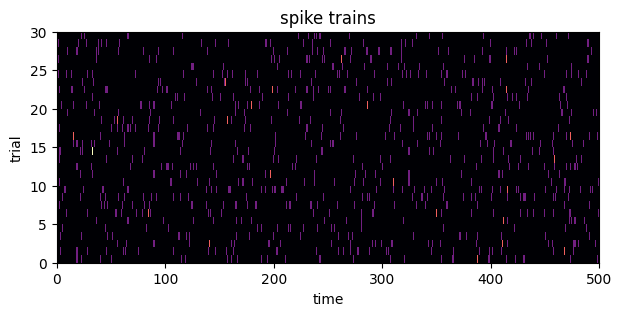

In [9]:
N = 30
rate = 50
duration = 0.5
spikes = generate_spikes(N, rate, duration)

plt.rcParams['figure.figsize']=(7,3)
plt.pcolormesh(spikes,cmap='magma')

# Adding details to the plot
plt.title('spike trains')
plt.xlabel('time')
plt.ylabel('trial')

# Displaying the plot
plt.show()


3) Repeat the above process (spike generation and rate estimation with the same parameters N=2, rate = 50, duration = 0.5 s) 1000 times and plot the distribution of estimates you obtain. What is the mean of this distribution and the variance?

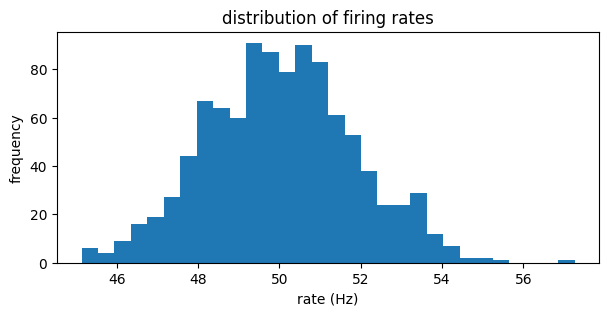

Mean of distribution: 50.041
Variance of distribution: 3.350172333333333


In [10]:
estimates = [mle_fr(generate_spikes(N, rate, duration)) for i in range(1000)]

plt.hist(estimates, bins=30)
plt.title('distribution of firing rates')
plt.xlabel('rate (Hz)')
plt.ylabel('frequency')
plt.show()

print(f"Mean of distribution: {np.mean(estimates)}")
print(f"Variance of distribution: {np.var(estimates)}")
print(f"The mean of the distribution should be the given rate, the variance should be rate*duration = ")

4) Now, we want to investigate how this variance depends on:

*   The number N of neurons
*   The duration of the spike-train

In order to perform this investigation, repeat the procedure in question 3) for the all the combinations of the following scenartios:

*   Nb_neurons   = (1, 2, 5, 10)
*   rates = (0.1 s, 0.5s, 1s, 2s)

Plot in a figure the table of the variances Nb_neurons x rates obtained by each combination of the two parameters

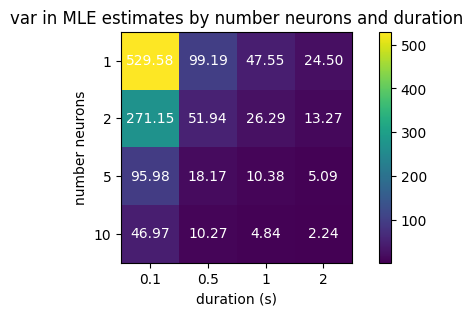

In [11]:
nb_neurons = [1, 2, 5, 10]
durations = [0.1, 0.5, 1, 2]
variances = {}

for N in nb_neurons:
    for d in durations:
        key = (N, d)
        estimates = [mle_fr(generate_spikes(N, rate, d)) for i in range(1000)]
        variances[key] = np.var(estimates)

fig, ax = plt.subplots()
im = ax.imshow([[variances[(n, d)] for d in durations] for n in nb_neurons])

# show all ticks
ax.set_xticks(np.arange(len(durations)))
ax.set_yticks(np.arange(len(nb_neurons)))
ax.set_xticklabels(durations)
ax.set_yticklabels(nb_neurons)

# add text
for i in range(len(nb_neurons)):
    for j in range(len(durations)):
        text = ax.text(j, i, f"{variances[(nb_neurons[i], durations[j])]:.2f}", ha="center", va="center", color="w")

ax.set_title("var in MLE estimates by number neurons and duration")
ax.set_xlabel("duration (s)")
ax.set_ylabel("number neurons")
fig.colorbar(im)
plt.show()
